# Iris Project Agenda

### data Loding

In [15]:
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv("D:\Machine Learning Projects\iris.csv")

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
df.shape

(150, 5)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [24]:
counter = df['species'].value_counts()
counter

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [25]:
import matplotlib.pyplot as plt

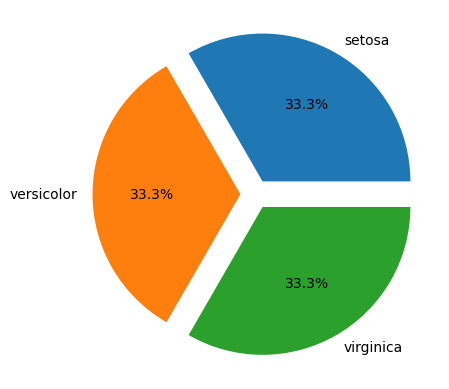

In [26]:
plt.pie(counter, labels=df['species'].unique(), autopct = '%1.1f%%', explode = (.1, .1, .1))
plt.show()

In [27]:
import plotly.express as px

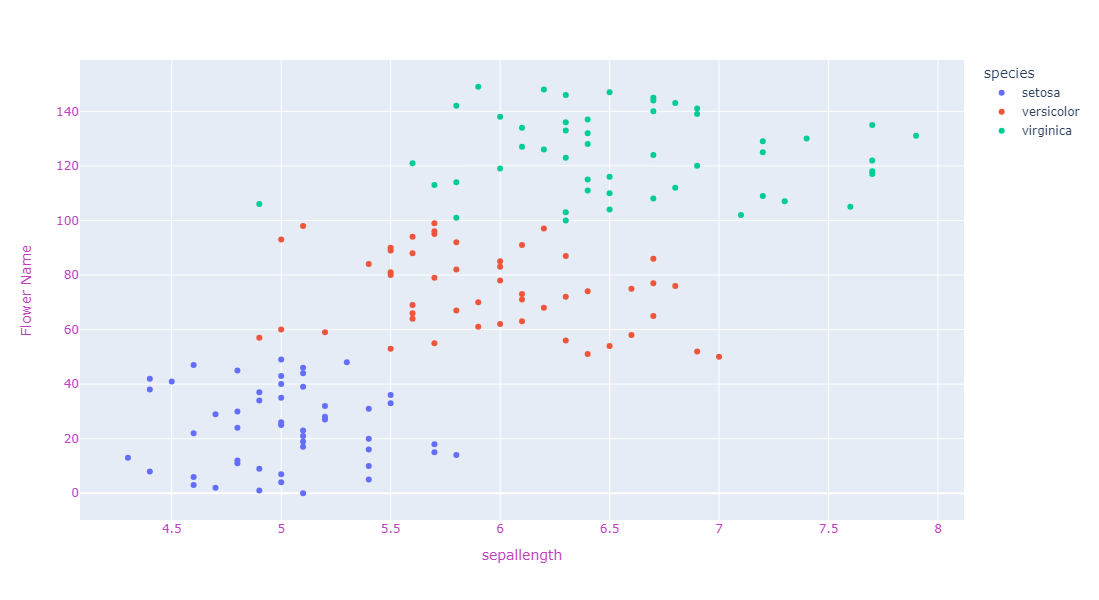

In [28]:
fig = px.scatter(data_frame=df, x = 'sepal_length', color = 'species')
fig.update_layout(width = 800, height = 600, 
                 xaxis = dict(title = 'sepallength', color = "#BF40BF"),
                 yaxis = dict(title = 'Flower Name', color = "#BF40BF"))

fig.show()

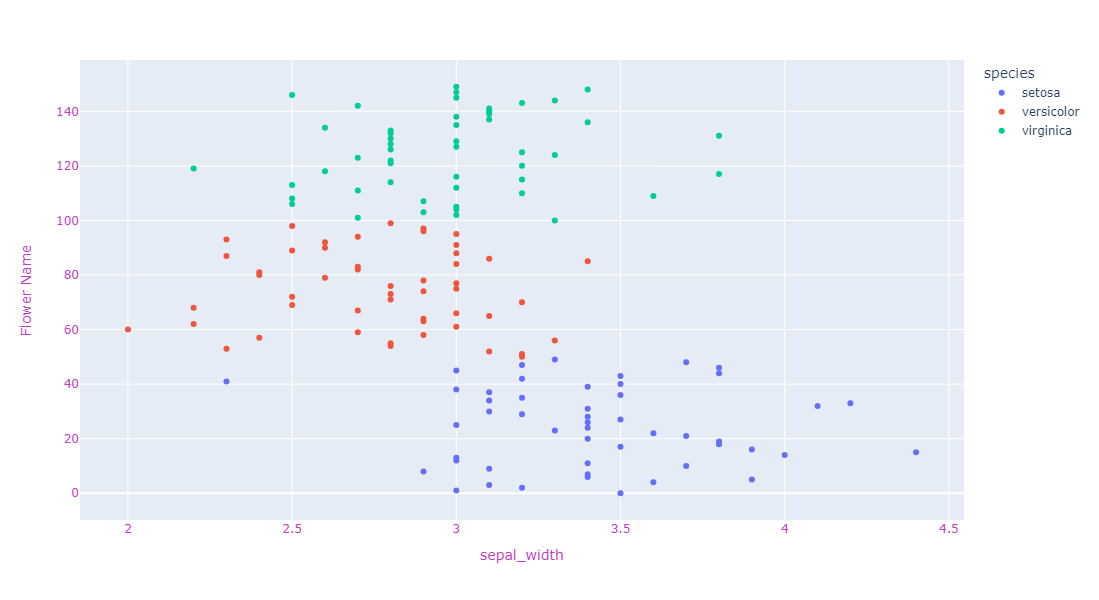

In [29]:
fig = px.scatter(data_frame=df, x = 'sepal_width', color = 'species')
fig.update_layout(width = 800, height = 600, 
                 xaxis = dict(title = 'sepal_width', color = "#BF40BF"),
                 yaxis = dict(title = 'Flower Name', color = "#BF40BF"))

fig.show()

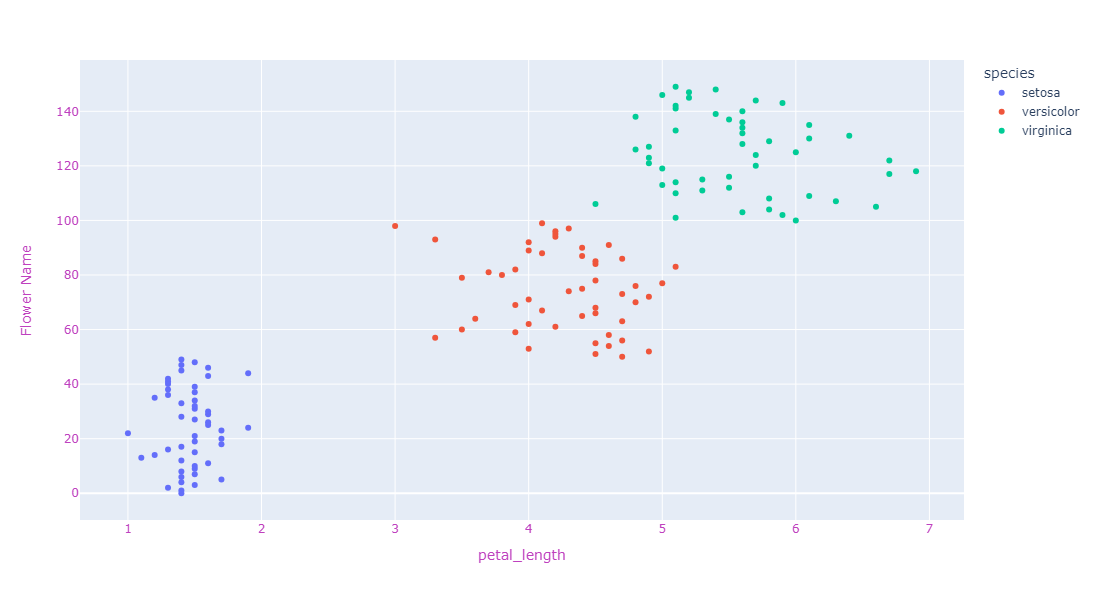

In [30]:
fig = px.scatter(data_frame=df, x = 'petal_length', color = 'species')
fig.update_layout(width = 800, height = 600, 
                 xaxis = dict(title = 'petal_length', color = "#BF40BF"),
                 yaxis = dict(title = 'Flower Name', color = "#BF40BF"))

fig.show()

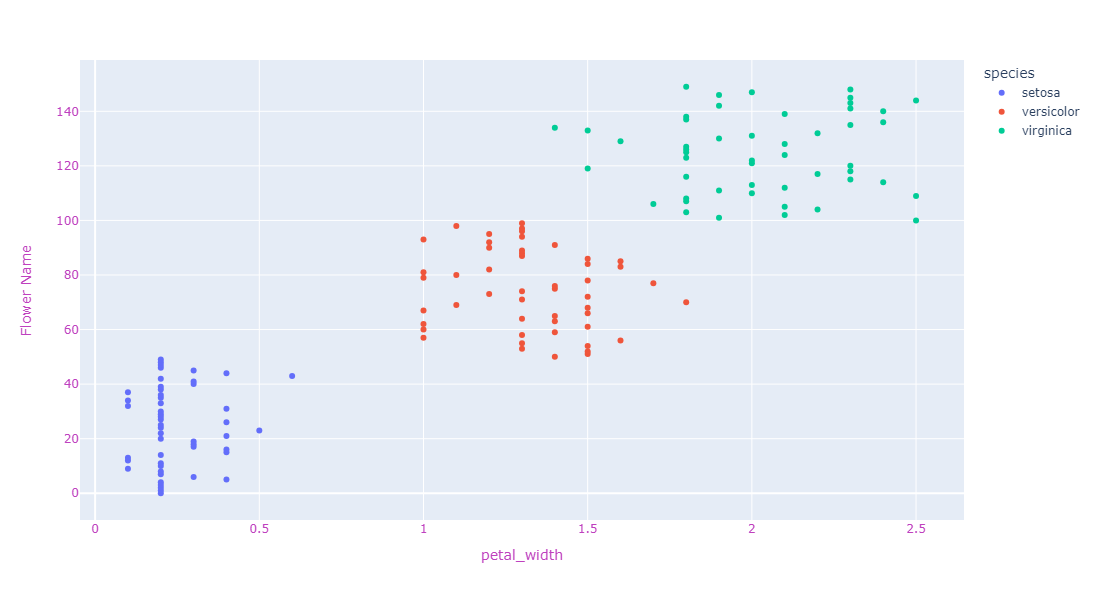

In [31]:
fig = px.scatter(data_frame=df, x = 'petal_width', color = 'species')
fig.update_layout(width = 800, height = 600, 
                 xaxis = dict(title = 'petal_width', color = "#BF40BF"),
                 yaxis = dict(title = 'Flower Name', color = "#BF40BF"))

fig.show()

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

df['species'] = le.fit_transform(df['species'])

In [34]:
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [35]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [42]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1,0.1,0.01,0.001]}

SVC = GridSearchCV(SVC(), param_grid, verbose=1)

In [44]:
SVC.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=1)

In [45]:
SVC.best_params_

{'C': 1, 'gamma': 0.1}

In [46]:
y_pred = SVC.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [48]:
accuracy_score(y_pred, y_test)

1.0

In [49]:
import seaborn as sns

<Axes: >

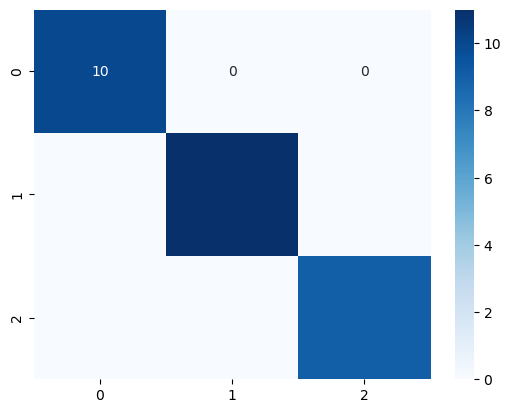

In [51]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, cmap='Blues')

In [55]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [56]:
prediction = SVC.predict([[4.9,3.0,1.4,0.2]])

In [57]:
prediction

array([0])

In [58]:
decode_labels = le.inverse_transform(prediction)
decode_labels

array(['setosa'], dtype=object)

In [59]:
import pickle

In [60]:
with open('Iris_Model.pkl', 'wb') as file:
    pickle.dump(SVC, file)

In [61]:
# load the model
with open('Iris_Model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [62]:
prediction = loaded_model.predict([[4.9,3.0,1.4,0.2]])
prediction

array([0])